# Creating a wildtype (WT / PD0), and Parkinson degeneration (PD2) network

In the directory ```network_path``` we have three sub directories ```PD0```, ```PD2-ref``` and ```PD2```. In order to generate the ```PD2``` network, we degenerate the ```PD0``` network by swapping the WT morphologies for the PD2 morphologies. In addition a subset of the synapses in the ```PD2-ref``` network are added to compensate for differences in pruning.

We need to specify a ```connection_override``` file. The difference compared to the standard connection file is that it contains ```recovery``` information, i.e. the fraction of synapses from the ```PD2-ref``` network that should be added to the ```PD2``` network.

The ```rc``` object is a ```ipyparallel``` ```RemoteClient``` object for parallel execution.

If you want to remap external input that was removed to a new position, then use ```remap_removed_input = True```

In [1]:
import os

network_path = os.path.join("networks","PD-example-10k")
#network_path = os.path.join("networks","PD-example-2_ref_0.9")

network_path_pd0 = os.path.join(network_path, "PD0")
network_path_pd2_ref = os.path.join(network_path, "PD2-ref")
network_path_pd2 = os.path.join(network_path, "PD2")

network_size = 10000
input_config = "test-input.json"  # Only background input will be used in this example

snudda_data_base_path = os.path.join("..", "..", "..", "..", "BasalGangliaData", "Parkinson", "20221213")
snudda_data_pd0 = os.path.join(snudda_data_base_path, "PD0")
snudda_data_pd2 = os.path.join(snudda_data_base_path, "PD2")

network_config_pd0 = os.path.join(snudda_data_base_path, "connectivity", "network-config.json")
# network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-synapse-recovery.json")
network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-basic.json")


input_pd0 = os.path.join(network_path_pd0, "input-spikes.hdf5")
input_pd2 = os.path.join(network_path_pd2, "input-spikes.hdf5")

# Do we want to remap removed input?
remap_removed_input = False
remapped_fraction = 0.0

# Do we want to remap removed input? -- if so we need to use network-config-PD-synapse.recovery.json also.
#remap_removed_input = True
#remapped_fraction = 0.9

rc = None

## First generate the WT reference network

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd0, random_seed=123456, snudda_data=snudda_data_pd0,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd0)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Adding Striatum with 10000 neurons (stay_inside=False)
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaDat

In [3]:
os.environ["IPYTHONDIR"] = os.path.join(os.path.abspath(os.getcwd()), ".ipython")
os.environ["IPYTHON_PROFILE"] = "default"
os.system("ipcluster start -n 6 --profile=$IPYTHON_PROFILE --ip=127.0.0.1 --log-level ERROR 2> parallel-log.txt &")

import time
time.sleep(10) # Wait for ipcluster to start

In [4]:
from snudda import Snudda
snd_pd0 = Snudda(network_path=network_path_pd0, parallel=True, ipython_profile="default")
snd_pd0.create_network()

Placing neurons
Network path: networks/PD-example-10k/PD0
Creating missing directory networks/PD-example-10k/PD0/log
Created directory networks/PD-example-10k/PD0/log
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/Parkinson/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-10k/PD0/network-config.json
Generating 43854 points for networks/PD-example-10k/PD0/mesh/Striatum-cube-mesh-0.0004989626526218353.obj
n_points = 41705, previous close_pairs = 88592
n_points = 39666, previous close_pairs = 72961
n_points = 37734, previous close_pairs = 60742
n_points = 35907, previous close_pairs = 50789
n_points = 34184, previous close_pairs = 42385
n_points = 32563, previous close_pairs = 35762
n_points = 31046, previous close_pairs = 29793
n_points = 29634, previous close_pairs = 25172
n_points = 28324, previous close_pairs = 21205
n_points = 27119, pr

In [5]:
snd_pd0.setup_input(input_config=input_config)

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/Parkinson/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-10k/PD0/network-config.json
Writing input spikes to networks/PD-example-10k/PD0/input-spikes.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-10k/PD0/network-config.json
importing SnuddaInput from snudda.input.input on engine(s)
Writing spikes to networks/PD-example-10k/PD0/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 819.1s


In [6]:
snd_pd0 = None

## Generate a PD2 reference network

This network will not have the same synapses as the WT, but it is used in order to add "recovery synapses" to compensate for part of the degeneration.

In [7]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd2_ref, random_seed=123456, snudda_data=snudda_data_pd2,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd2)

Adding Striatum with 10000 neurons (stay_inside=False)
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/2/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/2/m

In [8]:
from snudda import Snudda
snd_pd2_ref = Snudda(network_path=network_path_pd2_ref, parallel=True, ipython_profile="default")
snd_pd2_ref.create_network()

Placing neurons
Network path: networks/PD-example-10k/PD2-ref
Creating missing directory networks/PD-example-10k/PD2-ref/log
Created directory networks/PD-example-10k/PD2-ref/log
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/Parkinson/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-10k/PD2-ref/network-config.json
Generating 43854 points for networks/PD-example-10k/PD2-ref/mesh/Striatum-cube-mesh-0.0004989626526218353.obj
n_points = 41705, previous close_pairs = 88592
n_points = 39666, previous close_pairs = 72961
n_points = 37734, previous close_pairs = 60742
n_points = 35907, previous close_pairs = 50789
n_points = 34184, previous close_pairs = 42385
n_points = 32563, previous close_pairs = 35762
n_points = 31046, previous close_pairs = 29793
n_points = 29634, previous close_pairs = 25172
n_points = 28324, previous close_pairs = 21205


In [9]:
snd_pd2_ref.setup_input(input_config=input_config)

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/Parkinson/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-10k/PD2-ref/network-config.json
Writing input spikes to networks/PD-example-10k/PD2-ref/input-spikes.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-10k/PD2-ref/network-config.json
importing SnuddaInput from snudda.input.input on engine(s)
Writing spikes to networks/PD-example-10k/PD2-ref/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 582.5s


In [10]:
snd_pd2_ref = None

In [11]:
os.system(f"IPYTHONDIR={os.path.join(os.path.abspath(os.getcwd()), '.ipython')} && IPYTHON_PROFILE=default && ipcluster stop")

/home/hjorth/.local/lib/python3.9/site-packages/ipyparallel/apps/ipclusterapp.py:3: UserWarning: ipyparallel.apps.ipclusterapp is deprecated in ipyparallel 7. Use ipyparallel.cluster
  warnings.warn(f"{__name__} is deprecated in ipyparallel 7. Use ipyparallel.cluster")
2024-03-08 15:13:21.467 [IPClusterStop] Stopping cluster 
2024-03-08 15:13:21.467 [IPClusterStop] Stopping controller
2024-03-08 15:13:21.670 [IPClusterStop] Stopping engine(s): 1709905790


0

## Degenerating the PD0 network to get PD2 network

In [12]:
network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")

from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=network_file_pd0,
                                             updated_network_file=network_file_pd2_ref,
                                             output_network_file=network_file_pd2,
                                             original_snudda_data_dir=snudda_data_pd0,
                                             updated_snudda_data_dir=snudda_data_pd2,
                                             original_input_file=input_pd0,
                                             output_input_file=input_pd2)
swap.write_new_network_file()
swap.write_new_input_file(remap_removed_input=remap_removed_input, remapped_fraction=remapped_fraction)
swap.close()

Traceback (most recent call last):
  File "/home/hjorth/HBP/Snudda/snudda/neurons/morphology_data.py", line 483, in load_cache
    raise ValueError(f"Cache mismatch. Different paths:\nRequested: {self.swc_file}\nCached: {data['swc_file']}")
ValueError: Cache mismatch. Different paths:
Requested: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc
Cached: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc

Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc-cache.pickle
Traceback (most recent call last):
  File "/home/hjorth/HBP/Snudda/snudda/neurons/morphology_data.py", line 483, in load_cache
    raise ValueError(f"Cache mismatch. Different paths:\nRequested: {self.swc_file}\nCached: {data['swc_file']}")
ValueError: Cache mismatch. Different path

/home/hjorth/HBP/Snudda/snudda/utils/swap_to_degenerated_morphologies.py:295: RuntimeWarning: invalid value encountered in cast
  edited_synapses[:, 10] = new_sec_x * 1000


Traceback (most recent call last):
  File "/home/hjorth/HBP/Snudda/snudda/neurons/morphology_data.py", line 483, in load_cache
    raise ValueError(f"Cache mismatch. Different paths:\nRequested: {self.swc_file}\nCached: {data['swc_file']}")
ValueError: Cache mismatch. Different paths:
Requested: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc
Cached: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc

Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc-cache.pickle
Traceback (most recent call last):
  File "/home/hjorth/HBP/Snudda/snudda/neurons/morphology_data.py", line 483, in load_cache
    raise ValueError(f"Cache mismatch. Different paths:\nRequested: {self.swc_file}\nCached: {data['swc_file']}")
ValueError: Cache mismatch. Different paths:
Requested: /home/hjorth/HBP

In [13]:
swap = None

## Plotting of a degenerated neuron

In [14]:
# This is so we get the most central dSPN in the network
from snudda import SnuddaLoad
sl = SnuddaLoad(network_path_pd0)
neuron_id = list(sl.get_centre_neurons_iterator(neuron_type="dSPN", n_neurons=1))[0][0]

In [15]:
# neuron_id = 55
neuron_id

7623

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-10k/PD0/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-10k/PD0/network-config.json
Plotting 200 external synapses
Plotting 200 external synapses


/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:118: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=coords[:, 0], ys=coords[:, 1], zs=coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:125: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=syn_coords[:, 0], ys=syn_coords[:, 1], zs=syn_coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.p

Figure written: networks/PD-example-10k/PD0/figures/input-to-7623-dSPN_18-and-internal-synapses.png


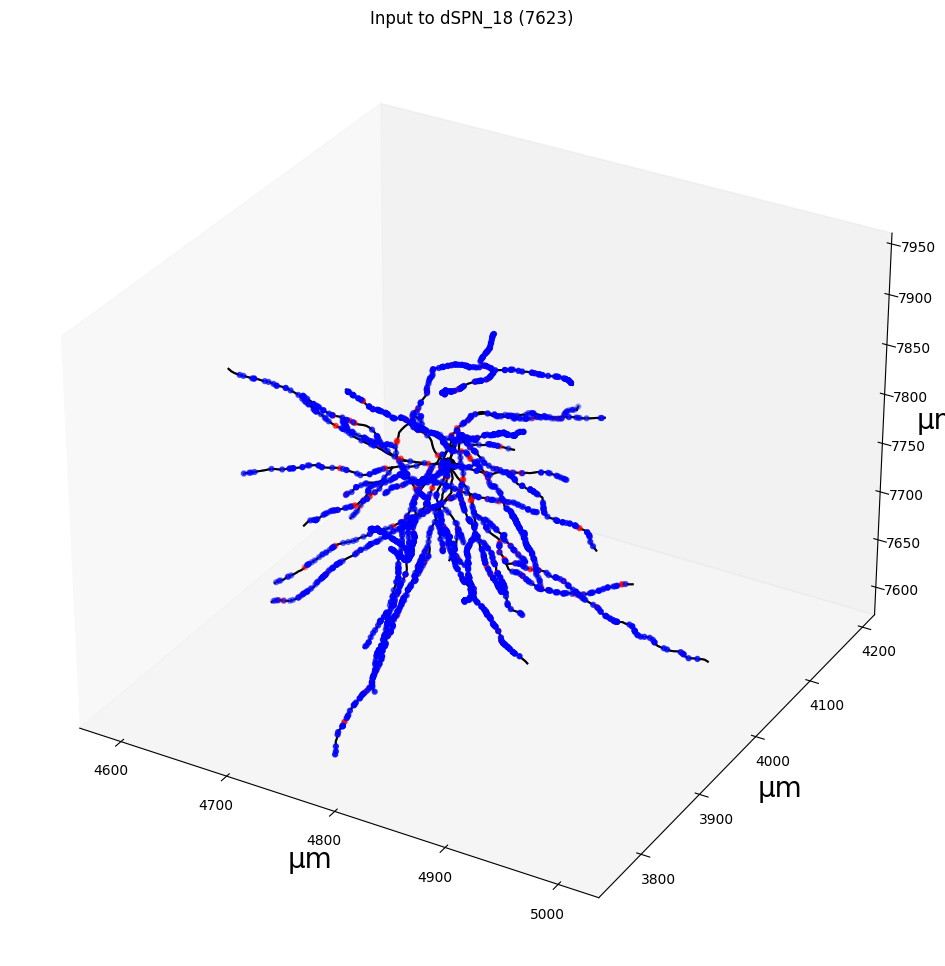

In [16]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

# Note here original and degenerate path were the same, so we are plotting the full neuron and its synapses.
pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd0)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)
#internal synapses are blue
#external synapses are red

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-10k/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-10k/PD2/network-synapses.hdf5
Plotting 200 external synapses
Plotting 127 external synapses


/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:118: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=coords[:, 0], ys=coords[:, 1], zs=coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:125: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=syn_coords[:, 0], ys=syn_coords[:, 1], zs=syn_coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.p

Figure written: networks/PD-example-10k/PD2/figures/input-to-7623-dSPN_18-and-internal-synapses.png


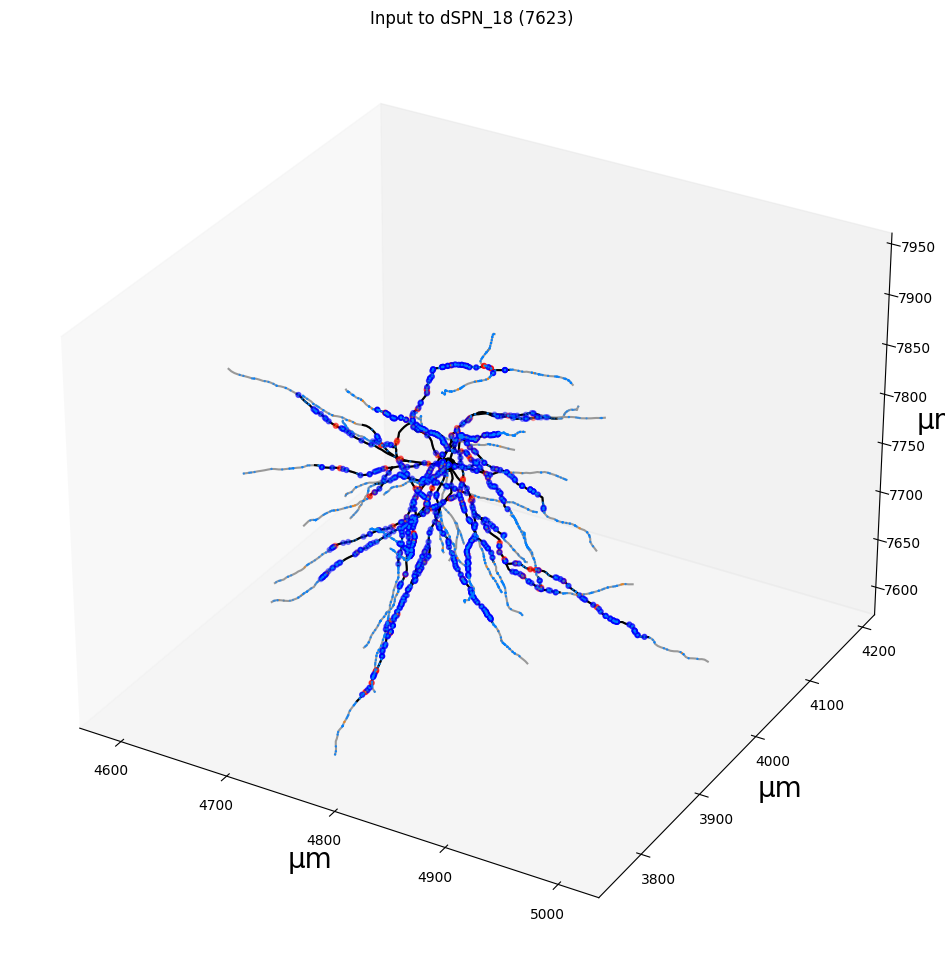

In [17]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-10k/PD0/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-10k/PD2-ref/network-config.json
Plotting 200 external synapses
Plotting 200 external synapses


/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:118: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=coords[:, 0], ys=coords[:, 1], zs=coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:125: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=syn_coords[:, 0], ys=syn_coords[:, 1], zs=syn_coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.p

Figure written: networks/PD-example-10k/PD2-ref/figures/input-to-7623-dSPN_18-and-internal-synapses.png


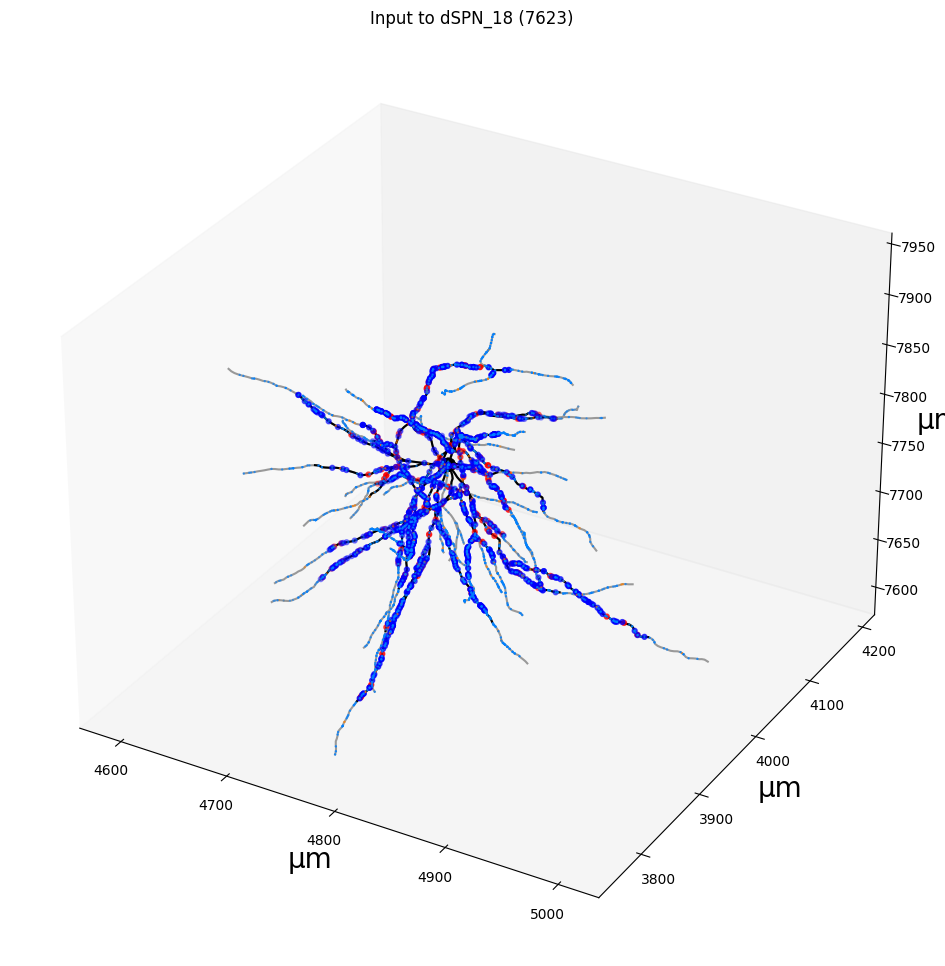

In [18]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2_ref)
#neuron_id = 55
pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)

In [19]:
from snudda.analyse.analyse_input import AnalyseInput

pd0_input_info = AnalyseInput(input_file=input_pd0, network_path=network_path_pd0)
pd2_input_info = AnalyseInput(input_file=input_pd2, network_path=network_path_pd2)

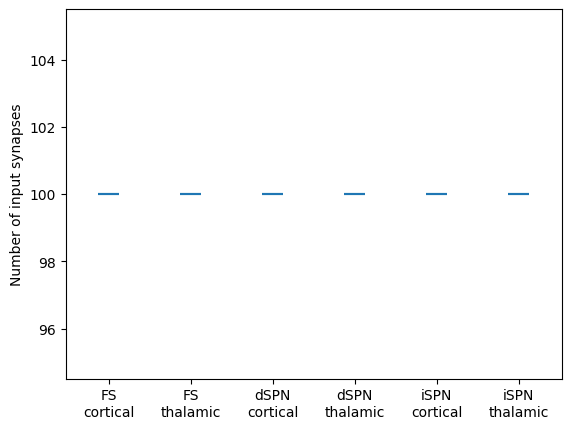

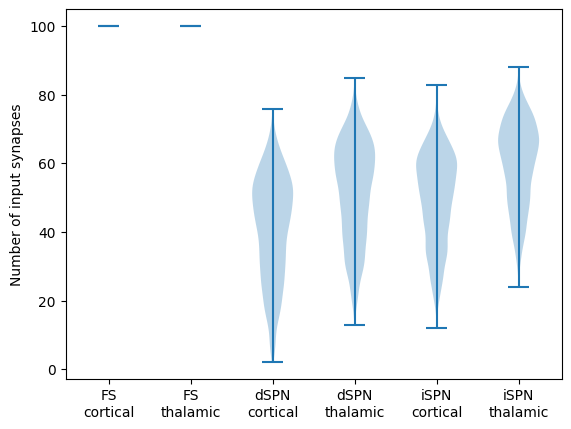

In [20]:
pd0_input_info.plot_input_count("PD0-input_example.png")
pd2_input_info.plot_input_count("PD2-input_example.png")

In [21]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-10k/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 9981 neurons with 5545921 synapses and 1499 gap junctions
Load done. 1.3
ChIN -> LTS: 2285 synapses
ChIN -> dSPN: 38828 synapses
ChIN -> iSPN: 46605 synapses
FS -> FS: 2427 synapses
FS -> LTS: 299 synapses
FS -> dSPN: 203034 synapses
FS -> iSPN: 123519 synapses
LTS -> ChIN: 3108 synapses
LTS -> dSPN: 10990 synapses
LTS -> iSPN: 7966 synapses
dSPN -> ChIN: 1492 synapses
dSPN -> dSPN: 1071065 synapses
dSPN -> iSPN: 281530 synapses
iSPN -> ChIN: 1502 synapses
iSPN -> dSPN: 1164165 synapses
iSPN -> iSPN: 2587106 synapses

PD2
Loading networks/PD-example-10k/PD2/network-synapses.hdf5
Loading config data from HDF5
Loading 9981 neurons with 1800534 synapses and 1499 gap junctions
Load done. 0.5
ChIN -> LTS: 2285 synapses
ChIN -> dSPN: 5384 synapses
ChIN -> iSPN: 15227 synapses
FS -> FS: 3145 synapses
FS -> LTS: 345 synapses
FS -> dSPN: 165639 synapses
FS -> iSPN: 113834 synapses
LTS -> ChIN: 310

0

In [22]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --listPre {neuron_id}"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-10k/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 9981 neurons with 5545921 synapses and 1499 gap junctions
Load done. 1.4
List neurons pre-synaptic to neuron_id = 7623 (dSPN_18)
The neuron receives 2250 synapses
103 : dSPN_13 (3 synapses)
189 : dSPN_31 (2 synapses)
202 : iSPN_15 (2 synapses)
212 : iSPN_26 (3 synapses)
360 : dSPN_33 (3 synapses)
413 : FS_2 (3 synapses)
434 : dSPN_18 (2 synapses)
505 : dSPN_1 (3 synapses)
537 : iSPN_0 (2 synapses)
556 : iSPN_16 (2 synapses)
585 : dSPN_19 (3 synapses)
599 : dSPN_28 (3 synapses)
601 : dSPN_31 (4 synapses)
604 : dSPN_33 (4 synapses)
631 : iSPN_23 (4 synapses)
634 : iSPN_24 (3 synapses)
637 : iSPN_26 (3 synapses)
641 : iSPN_29 (4 synapses)
644 : iSPN_30 (2 synapses)
718 : iSPN_20 (4 synapses)
744 : FS_1 (3 synapses)
745 : dSPN_0 (4 synapses)
750 : dSPN_2 (2 synapses)
760 : dSPN_12 (3 synapses)
763 : dSPN_14 (4 synapses)
771 : dSPN_22 (3 synapses)
773 : dSPN_23 (3 synapses)
774 : dSPN_24 (3 sy

0

Added: 12, removed: 805, kept: 605


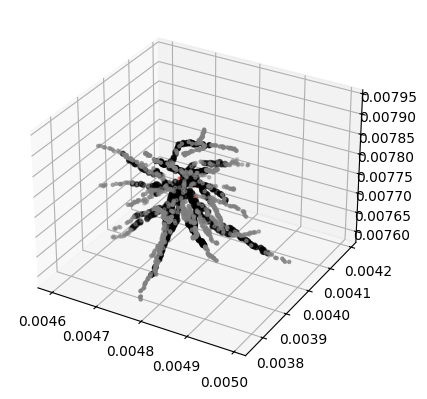

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [23]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2, 
                                neuron_id=neuron_id)
pdg.plot_synapses()

Added: 267, removed: 982, kept: 428


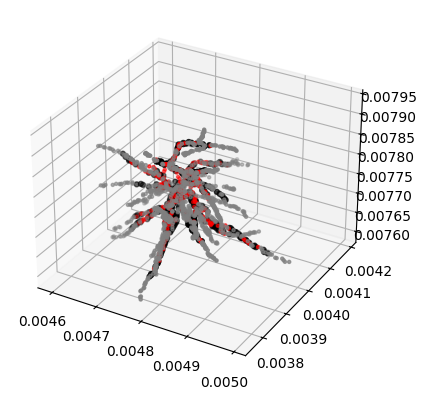

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [24]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2_ref, 
                                neuron_id=neuron_id)
pdg.plot_synapses()

In [25]:
from snudda.analyse.analyse import SnuddaAnalyse


network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")

dist3D = False
y_max_H = None

sa_pd0 = SnuddaAnalyse(network_file_pd0)
sa_pd2 = SnuddaAnalyse(network_file_pd2)
sa_pd2_ref = SnuddaAnalyse(network_file_pd2_ref)    

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 9981
Synapse row 0 - 0.0 % time: 0.09590765554457903 seconds
Synapse row 1000000 - 18.03127018938784 % time: 1.0616571977734566 seconds
Synapse row 1909184 - 34.42501254525624 % time: 1.92861302010715 seconds
Synapse row 2818368 - 50.81875490112463 % time: 2.797268974594772 seconds
Synapse row 3727552 - 67.21249725699302 % time: 3.64993095677346 seconds
Synapse row 4636736 - 83.60623961286142 % time: 4.508365733548999 seconds
Created connection matrix 5.277761960402131 seconds
GJ row : 0 - 0.0 %  time : 0.00397101417183876 seconds
Created gap junction connection matrix 0.007229821756482124 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 9981/9981
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 5545921, at 0
n_synapses = 5545921, at 1000000
n_synapses = 5545921, at 2000000
n_synapses = 5545921, at 3000000
n_synapses = 554592

Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [9999993.]
P(d<5e-05) = 0.05690174608830866
P(d<0.0001) = 0.04190766202779609
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections
Requested: 10000000.0 calculated [9999973.]


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


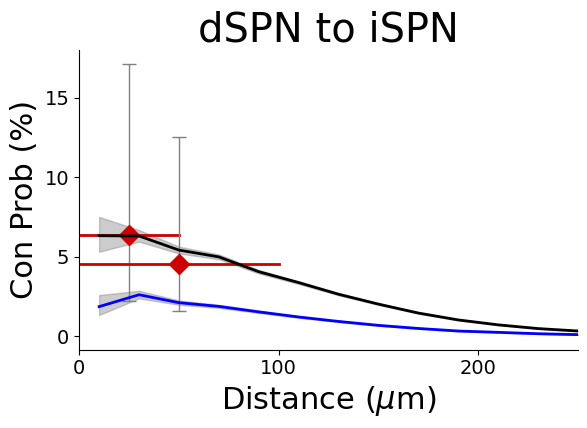

Wrote networks/PD-example-10k/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png


({},
 'networks/PD-example-10k/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png')

In [26]:
ax = sa_pd0.plot_connection_probability("dSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(3, 47), (3, 66)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("dSPN", "iSPN", dist_3d=True, ax=ax, colour="blue")

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 111037 connections


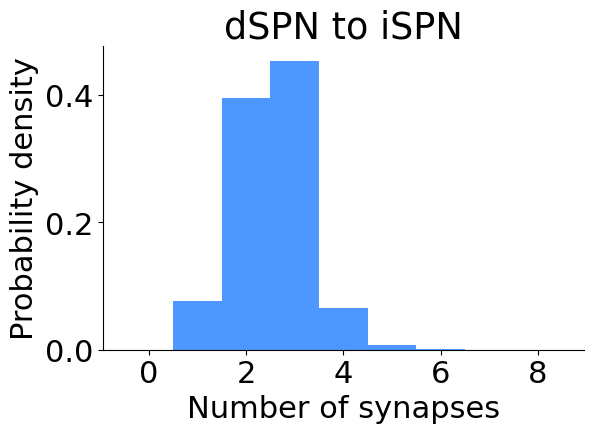

Wrote networks/PD-example-10k/PD0/figures/Network-number-of-synapses-from-dSPN-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 38338 connections


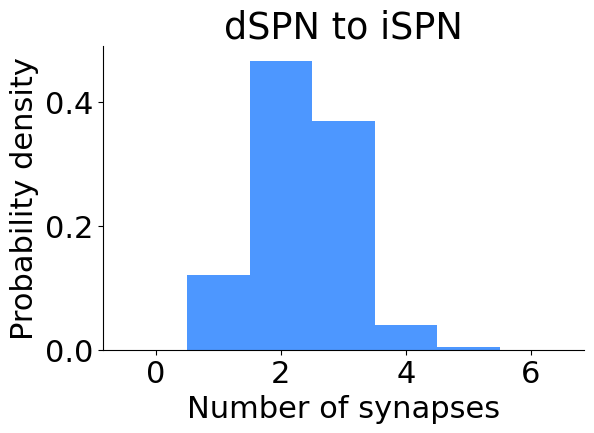

Wrote networks/PD-example-10k/PD2/figures/Network-number-of-synapses-from-dSPN-to-iSPN-per-cell.png


In [27]:
sa_pd0.plot_num_synapses_per_pair("dSPN", "iSPN")
sa_pd2.plot_num_synapses_per_pair("dSPN", "iSPN")

Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [9997913.]
P(d<5e-05) = 0.2403874233427431
P(d<0.0001) = 0.16350460079408388
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections
Requested: 10000000.0 calculated [9997995.]
P(d<5e-05) = 0.07303581626825488


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


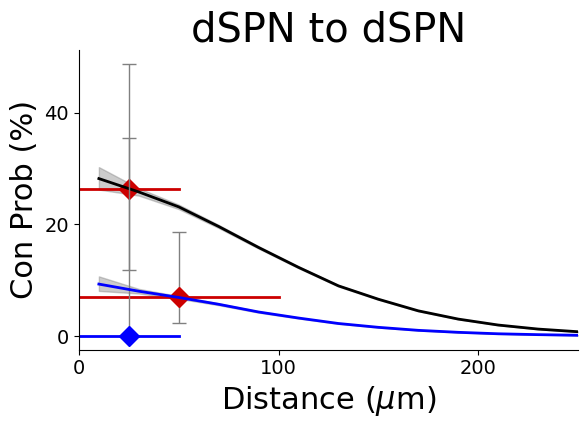

Wrote networks/PD-example-10k/PD2/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 364064 connections


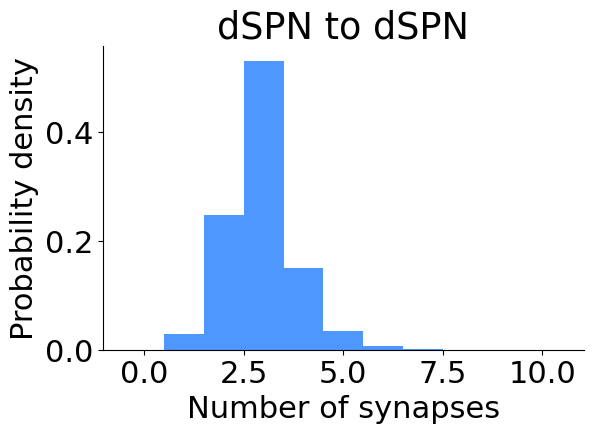

Wrote networks/PD-example-10k/PD0/figures/Network-number-of-synapses-from-dSPN-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 91309 connections


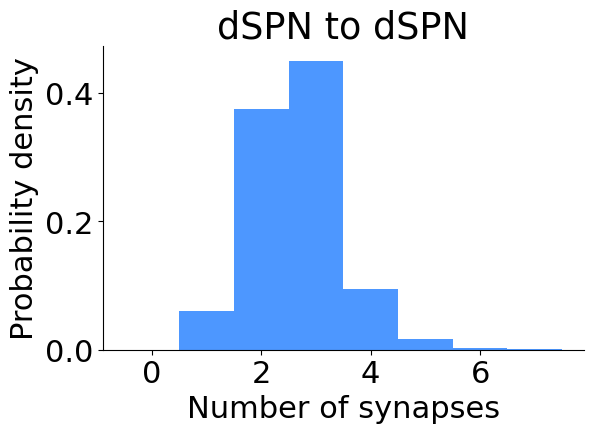

Wrote networks/PD-example-10k/PD2/figures/Network-number-of-synapses-from-dSPN-to-dSPN-per-cell.png


In [28]:
ax = sa_pd0.plot_connection_probability("dSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(5, 19), (3, 43)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("dSPN", "dSPN", dist_3d=True, ax=ax, colour="blue", exp_colour="blue", exp_data_detailed=[(0, 7)], exp_max_dist=[50e-6])

sa_pd0.plot_num_synapses_per_pair("dSPN", "dSPN")
sa_pd2.plot_num_synapses_per_pair("dSPN", "dSPN")

Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [9997947.]
P(d<5e-05) = 0.3467361431045165
P(d<0.0001) = 0.26447794456800217
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections
Requested: 10000000.0 calculated [9997954.]
P(d<5e-05) = 0.1572475310608474


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


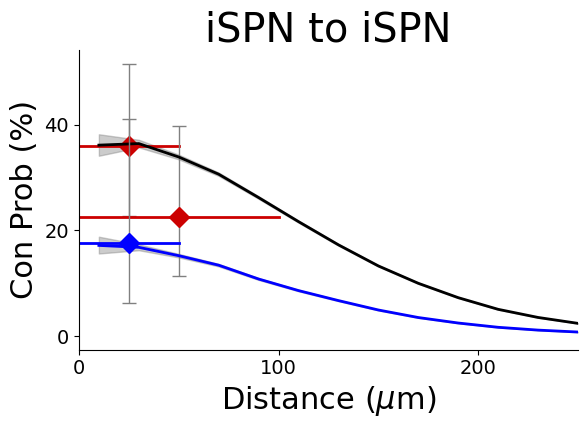

Wrote networks/PD-example-10k/PD2/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 764560 connections


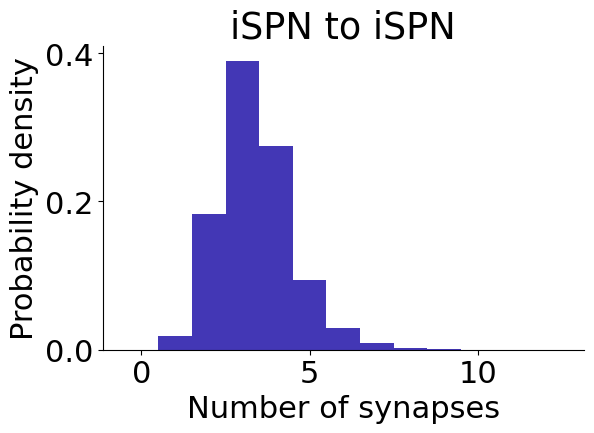

Wrote networks/PD-example-10k/PD0/figures/Network-number-of-synapses-from-iSPN-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 285880 connections


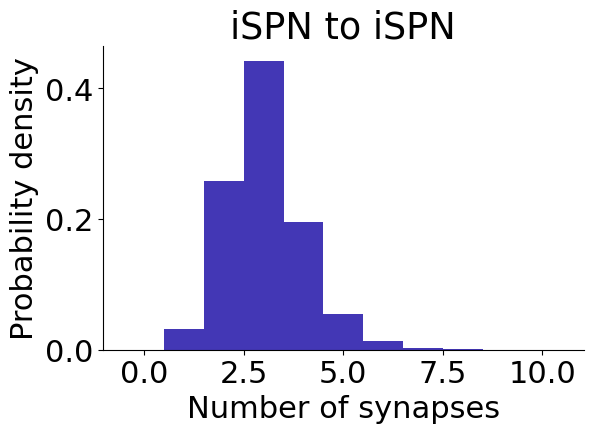

Wrote networks/PD-example-10k/PD2/figures/Network-number-of-synapses-from-iSPN-to-iSPN-per-cell.png


In [29]:
ax = sa_pd0.plot_connection_probability("iSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(14, 39), (7, 31)], return_ax=True, show_plot=False, save_figure=False)
# PD connectivity from Taverna et al 2008
sa_pd2.plot_connection_probability("iSPN", "iSPN", dist_3d=True, ax=ax, colour="blue", exp_colour="blue", exp_data_detailed=[(3,17)], exp_max_dist=[50e-6])

sa_pd0.plot_num_synapses_per_pair("iSPN", "iSPN")
sa_pd2.plot_num_synapses_per_pair("iSPN", "iSPN")

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [9999990.]
P(d<5e-05) = 0.2550776873995422
P(d<0.0001) = 0.17106050832749395
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections
Requested: 10000000.0 calculated [9999988.]
P(d<5e-05) = 0.08756865350031592


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


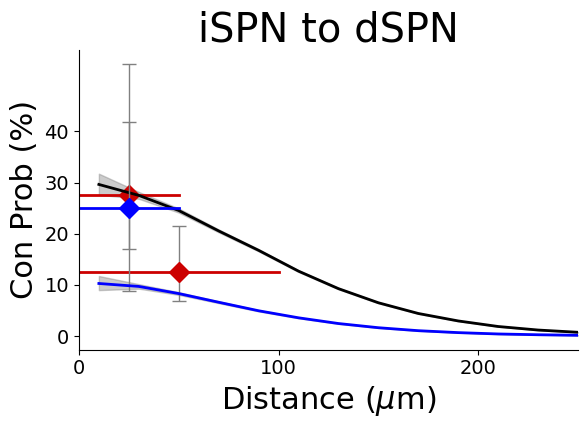

Wrote networks/PD-example-10k/PD2/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 375033 connections


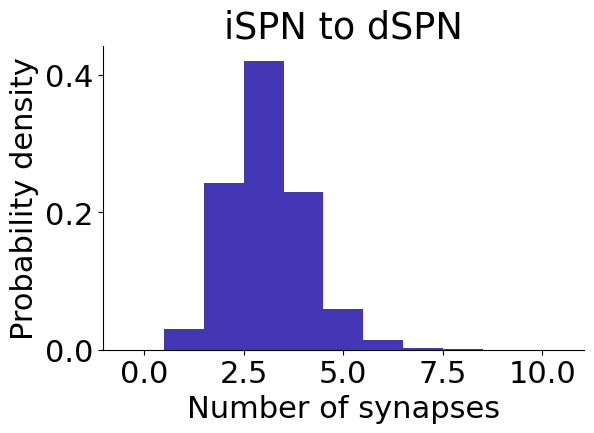

Wrote networks/PD-example-10k/PD0/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 101795 connections


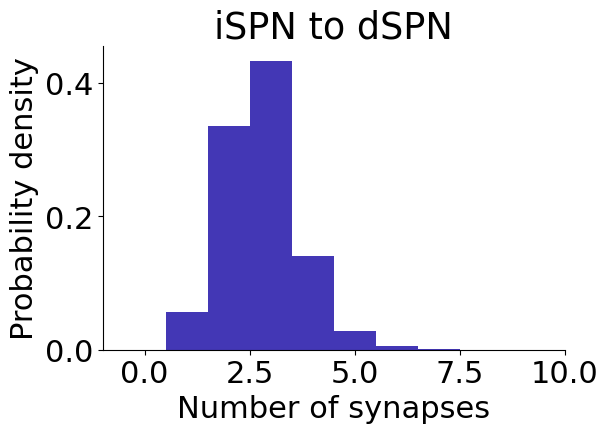

Wrote networks/PD-example-10k/PD2/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.png


In [30]:
ax = sa_pd0.plot_connection_probability("iSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(13, 47), (10, 80)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("iSPN", "dSPN", dist_3d=True, ax=ax, colour="blue", exp_colour="blue", exp_max_dist=[50e-6], exp_data_detailed=[(3, 12)])

sa_pd0.plot_num_synapses_per_pair("iSPN", "dSPN")
sa_pd2.plot_num_synapses_per_pair("iSPN", "dSPN")

Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 132/132
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [17292.]
P(d<0.00025) = 0.12740637031851593
Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 132/132
Counting connections
Requested: 10000000.0 calculated [17292.]


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


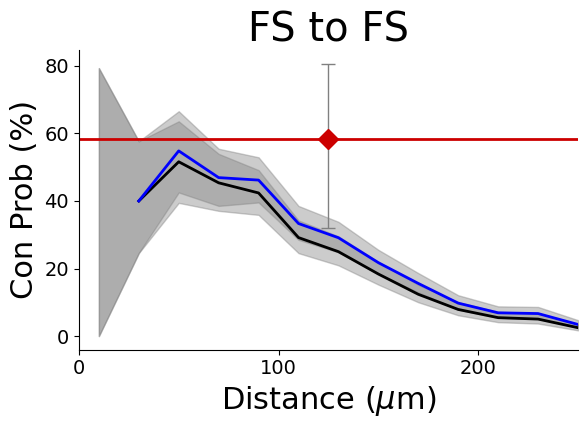

Wrote networks/PD-example-10k/PD2/figures/Network-distance-dependent-connection-probability-FS-to-FS-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 132/132
Calculating max synapses
Calculating mean synapses
Plotting 811 connections


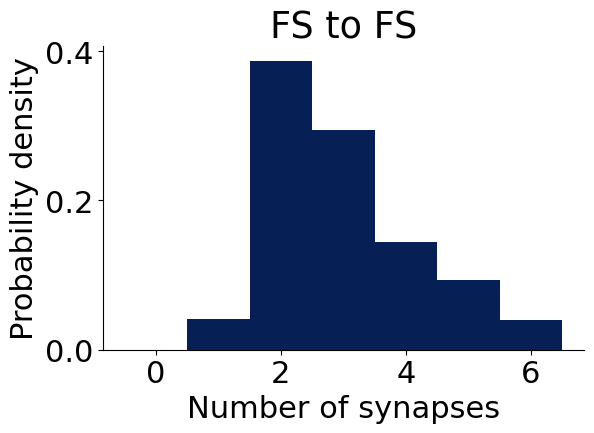

Wrote networks/PD-example-10k/PD0/figures/Network-number-of-synapses-from-FS-to-FS-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 132/132
Calculating max synapses
Calculating mean synapses
Plotting 963 connections


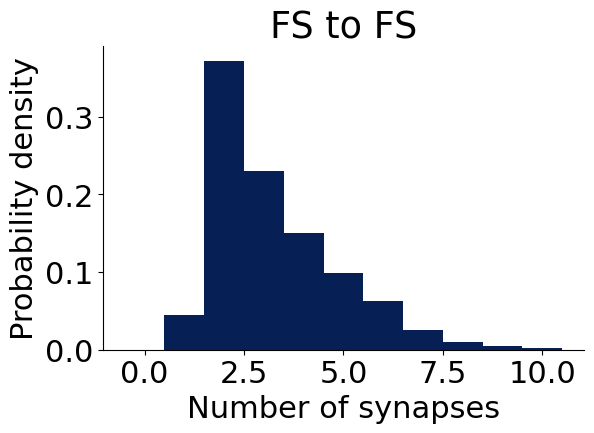

Wrote networks/PD-example-10k/PD2/figures/Network-number-of-synapses-from-FS-to-FS-per-cell.png


In [31]:
ax = sa_pd0.plot_connection_probability("FS", "FS", dist_3d=True, exp_max_dist=[250e-6], exp_data_detailed=[(7, 12)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "FS", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "FS")
sa_pd2.plot_num_synapses_per_pair("FS", "FS")

Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [637956.]
P(d<0.0001) = 0.46944847862279054
P(d<0.00015) = 0.34335868353766474
P(d<0.00025) = 0.1516185416337494
Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections
Requested: 10000000.0 calculated [637956.]


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


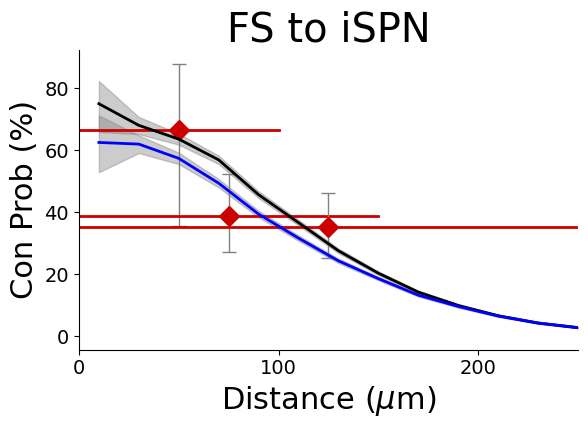

Wrote networks/PD-example-10k/PD2/figures/Network-distance-dependent-connection-probability-FS-to-iSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 33041 connections


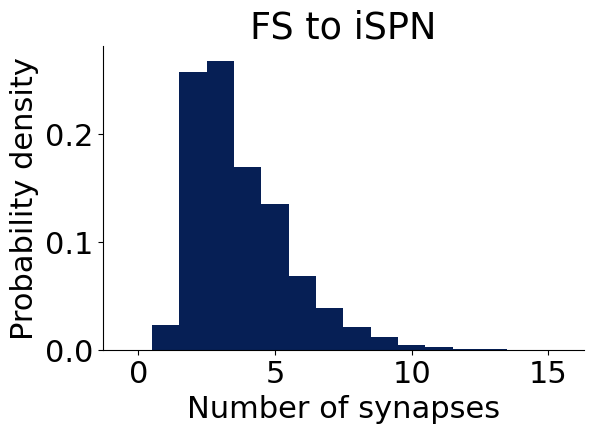

Wrote networks/PD-example-10k/PD0/figures/Network-number-of-synapses-from-FS-to-iSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 30099 connections


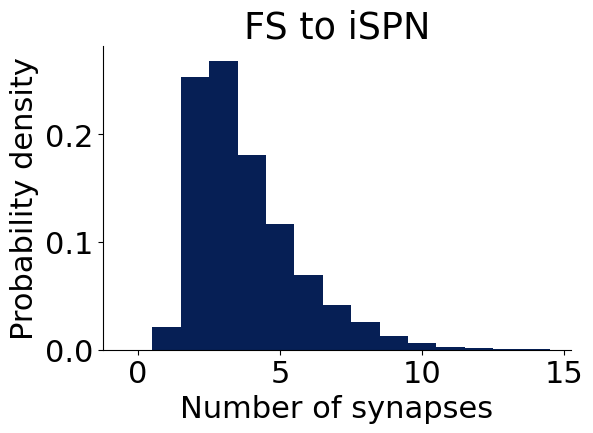

Wrote networks/PD-example-10k/PD2/figures/Network-number-of-synapses-from-FS-to-iSPN-per-cell.png


In [32]:
ax = sa_pd0.plot_connection_probability("FS", "iSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(6, 9), (21, 54), (27,77)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "iSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "iSPN")
sa_pd2.plot_num_synapses_per_pair("FS", "iSPN")

Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


Requested: 10000000.0 calculated [637956.]
P(d<0.0001) = 0.6467987202070676
P(d<0.00015) = 0.4924724043489086
P(d<0.00025) = 0.22740965372719305
Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 4833/4833
Counting connections
Requested: 10000000.0 calculated [637956.]


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


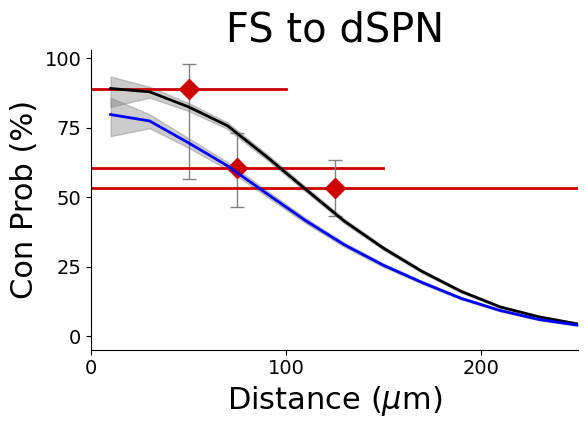

Wrote networks/PD-example-10k/PD2/figures/Network-distance-dependent-connection-probability-FS-to-dSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 49174 connections


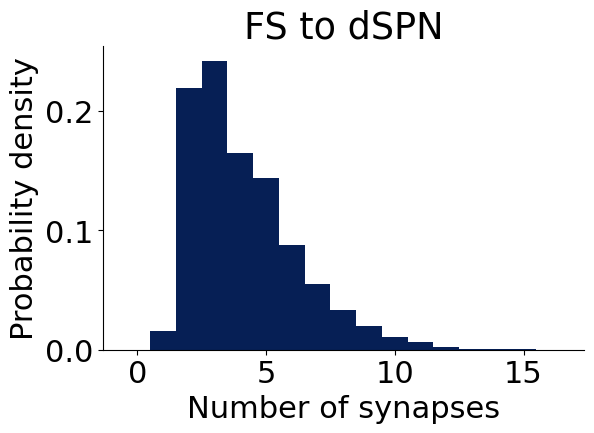

Wrote networks/PD-example-10k/PD0/figures/Network-number-of-synapses-from-FS-to-dSPN-per-cell.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 4833/4833
Calculating max synapses
Calculating mean synapses
Plotting 40437 connections


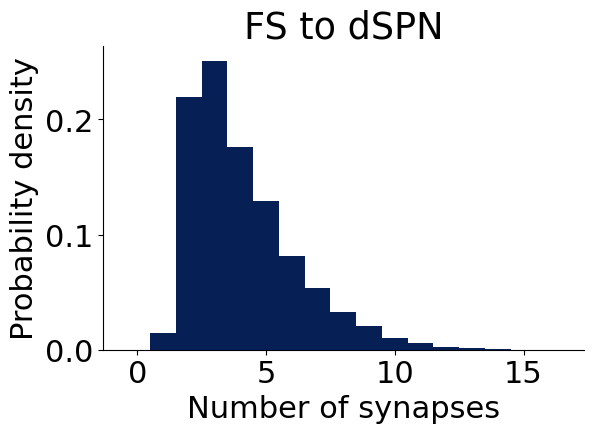

Wrote networks/PD-example-10k/PD2/figures/Network-number-of-synapses-from-FS-to-dSPN-per-cell.png


In [33]:
ax = sa_pd0.plot_connection_probability("FS", "dSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(8, 9), (29, 48), (48,90)], return_ax=True, show_plot=False, save_figure=False)
sa_pd2.plot_connection_probability("FS", "dSPN", dist_3d=True, ax=ax, colour="blue")

sa_pd0.plot_num_synapses_per_pair("FS", "dSPN")
sa_pd2.plot_num_synapses_per_pair("FS", "dSPN")